In [1]:
import os
from pathlib import Path
import astropy
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table, vstack

In [2]:
pabdatazcut = fits.open('pabdatazcut.fits')
#pabdatazcut.info()

In [3]:
#Sorted by descending Paschen Beta flux
sortedpab = sorted(pabdatazcut[1].data , key = lambda data: data['PAB_FLUX'] , reverse = True )

data_dict= dict()
for obj in sortedpab:
    for key in ['FIELD', 'ID', 'Z_50', 'Z_84','Z_16' , 'PAB_FLUX', 'PAB_FLUX_ERR']:
        data_dict.setdefault(key, list()).append(obj[key])

sortedpabdf = pd.DataFrame(data_dict)
sortedpabdf['Z_ERR']= ((sortedpabdf['Z_84'] - sortedpabdf['Z_50']) + (sortedpabdf['Z_50'] - sortedpabdf['Z_16'])) / (2 * sortedpabdf['Z_50'])
sortedpabdf['WAVE_PAB'] = 12820 * (1 + sortedpabdf['Z_50'])
sortedpabdf = sortedpabdf[['FIELD' , 'ID' , 'Z_50' , 'Z_ERR' , 'PAB_FLUX' , 'PAB_FLUX_ERR' , 'WAVE_PAB']]

sortedpabdf


,FIELD,ID,Z_50,Z_ERR,PAB_FLUX,PAB_FLUX_ERR,WAVE_PAB
0,GN2,19651,0.320798,0.001238,1020.741299,228.253394,16932.630576
1,GN3,26823,0.298029,0.004083,240.294079,64.171186,16640.737705
2,GN4,26823,0.298002,0.004091,238.015632,64.187783,16640.386080
3,GS4,19146,0.211923,0.004738,218.857585,16.852526,15536.853897
4,GN3,28121,0.033801,0.008694,201.448601,0.919987,13253.322571
5,GN4,28121,0.033801,0.008696,201.367583,0.919604,13253.326078
6,GN1,38114,0.216481,0.035065,116.097868,1.572837,15595.283645
7,GN2,16267,0.322897,0.007501,96.095087,29.428247,16959.541609
8,GN4,22285,0.300270,0.003354,87.932682,30.433167,16669.465940
9,GN3,34456,0.224320,0.010113,85.415665,2.751076,15695.781592


In [134]:
sortedpabdf.at[0 , 'WAVE_PAB']

16932.630576492287

16932.630576492287


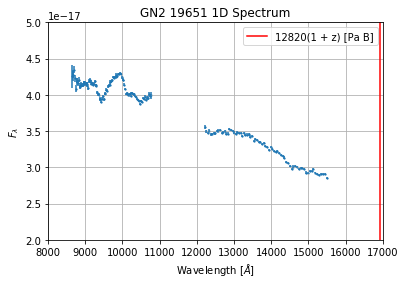

In [63]:
grism1D19651 = fits.open('GN2_19651.1D.fits')
pabz19651 = (1 + sortedpab[0]['z_50']) * 12820
print(pabz19651)
df19651 = pd.DataFrame(grism1D19651[1].data)
df19651b = pd.DataFrame(grism1D19651[2].data)
df19651 = df19651.append(df19651b)
df19651 = df19651.replace([0], np.nan)
list(df19651.columns.values)
#if df1['flux'] > 0:
#    print(max(df1['wave']))
#print(max(df1['wave']) , df1['flux'])

plt.scatter(df19651['wave'] , df19651['flux'] / df19651['flat'] , s = 1.5)
plt.title('GN2 19651 1D Spectrum')
plt.axvline(pabz19651, color='r', label='12820(1 + z) [Pa B]')
plt.legend()
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(df19651['wave'], df19651['flux'] / df19651['flat'],yerr=df19651['err'] / df19651['flat'], linestyle="None")
plt.axis([8000 , 17000 , 2.0e-17 , 5e-17])
#plt.axis([None, max(x1d37717g141) , None , max(y1d37717g102)])
plt.grid()
plt.show()

16640.737704541956
False


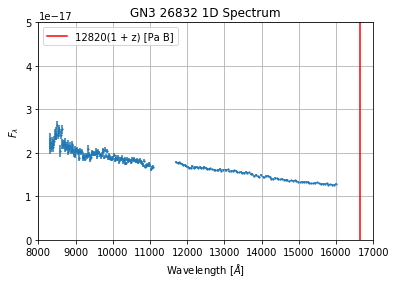

In [92]:
grism1D26832 = fits.open('GN3_26823.1D.fits')
pabz26832 = (1 + sortedpab[1]['z_50']) * 12820
print(pabz26832)
df26832 = pd.DataFrame(grism1D26832[1].data)
df26832b = pd.DataFrame(grism1D26832[2].data)
df26832 = df26832.append(df26832b)
df26832 = df26832[df26832.flux != 0]
#list(df26832.columns.values)

if pabz26832 < max(df26832['wave']):
    print('True')
else:
    print('False')


plt.scatter(df26832['wave'] , df26832['flux'] / df26832['flat'] , s = 1.5)
plt.title('GN3 26832 1D Spectrum')
plt.axvline(pabz26832, color='r', label='12820(1 + z) [Pa B]')
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(df26832['wave'], df26832['flux'] / df26832['flat'],yerr=df26832['err'] / df26832['flat'], linestyle="None")
plt.axis([8000 , 17000 , 0.0e-17 , 5e-17])
plt.legend()
plt.grid()
plt.show()

15536.853896557714
True


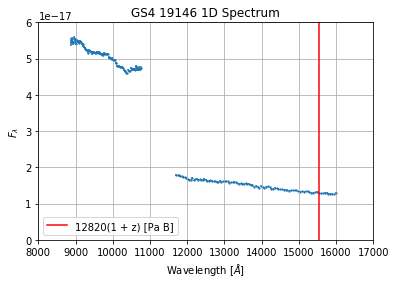

In [96]:
grism1D19146 = fits.open('GS4_19146.1D.fits')
pabz19146 = (1 + sortedpab[3]['z_50']) * 12820
print(pabz19146)
df19146 = pd.DataFrame(grism1D19146[1].data)
df19146b = pd.DataFrame(grism1D19146[2].data)
df19146 = df19146.append(df26832b)
df19146 = df19146[df19146.flux != 0]

#list(df26832.columns.values)
if pabz19146 < max(df19146['wave']):
    print('True')
else:
    print('False')

plt.scatter(df19146['wave'] , df19146['flux'] / df19146['flat'] , s = 1.5)
plt.title('GS4 19146 1D Spectrum')
plt.axvline(pabz19146, color='r', label='12820(1 + z) [Pa B]')
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(df19146['wave'], df19146['flux'] / df19146['flat'],yerr=df19146['err'] / df19146['flat'], linestyle="None")
plt.axis([8000 , 17000 , 0.0e-17 , 6e-17])
plt.legend()
plt.grid()
plt.show()

In [174]:
Path('GN3_28121.1D.fits').resolve()

grism1D28121 = fits.open('C:/Users/nikko/grismdata/GN3_28121.1D.fits')

In [175]:
#grism1D28121 = fits.open('GN3_28121.1D.fits')
pabz28121 = sortedpabdf.at[4 , 'WAVE_PAB']
print(pabz28121)
df28121 = pd.DataFrame(grism1D28121[1].data)
df28121b = pd.DataFrame(grism1D28121[2].data)
df28121 = df28121.append(df28121b)
df28121 = df28121[df28121.flux != 0]

#list(df26832.columns.values)
if min(df28121['wave']) < pabz28121 < max(df28121['wave']):
    print('True')
else:
    print('False')

13253.32257094853
True


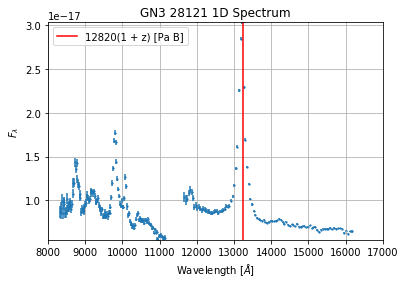

In [176]:
plt.scatter(df28121['wave'] , df28121['flux'] / df28121['flat'] , s = 1.5)
plt.title('GN3 28121 1D Spectrum')
plt.axvline(pabz28121, color='r', label='12820(1 + z) [Pa B]')
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(df28121['wave'], df28121['flux'] / df28121['flat'],yerr=df28121['err'] / df28121['flat'], linestyle="None")
plt.axis([8000 , 17000 , min(df28121['flux'] / df28121['flat']) , max(df28121['flux'] / df28121['flat'])])
plt.legend()
plt.grid()
plt.show()


No handles with labels found to put in legend.


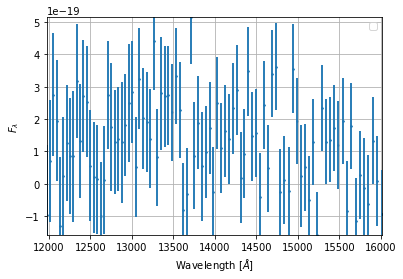

,wave,flux,err,flat,line,cont
37,11975.609086,-0.047053,0.104799,4.817878e+17,0.137929,0.133607
38,12015.167033,0.034862,0.091949,4.872247e+17,0.139270,0.134649
39,12054.855636,0.136167,0.093495,4.935281e+17,0.140938,0.135748
40,12094.675329,0.098019,0.093805,5.014800e+17,0.141757,0.137050
41,12134.626543,-0.066836,0.108640,5.084337e+17,0.142118,0.138284
42,12174.709713,0.012090,0.094204,5.126588e+17,0.141740,0.138875
43,12214.925276,0.065705,0.093248,5.194806e+17,0.141902,0.139967
44,12255.273668,0.045378,0.093712,5.243079e+17,0.142109,0.140648
45,12295.755327,0.044966,0.107098,5.294860e+17,0.142953,0.141576
46,12336.370696,0.170956,0.094380,5.353188e+17,0.143526,0.142226


In [10]:
grism1D35547 = fits.open('D:/clear/RELEASE_v2.1.0/spec1D/GS3/GS3_35547.1D.fits')
tbl = Table.read('D:/clear/RELEASE_v2.1.0/spec1D/GS3/GS3_35547.1D.fits', hdu=1)
try:
    tbl2 = Table.read('D:/clear/RELEASE_v2.1.0/spec1D/GS3/GS3_35547.1D.fits', hdu=2)
except:
    pass
else:
    tbl = vstack([tbl, tbl2])
df = tbl.to_pandas()
df = df[df.flux != 0]
plt.scatter(df['wave'] , df['flux'] / df['flat'] , s = 1.5)
#plt.title(str(sortedpabdf.at[i , 'FIELD']) + ' ' + str(sortedpabdf.at[i , 'ID']) + ' ' + '1D Spectrum')
#plt.axvline(pabz, color='r', label='12820(1 + z) [Pa B]')
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(df['wave'], df['flux'] / df['flat'],yerr=df['err'] / df['flat'], linestyle="None")
plt.axis([min(df['wave']) , max(df['wave']) , min(df['flux'] / df['flat']) , max(df['flux'] / df['flat'])])
plt.legend()
plt.grid()
plt.show()
#grism1D35547[2].header
#df35547 = pd.DataFrame(grism1D35547[1].data)
#df35547=pd.DataFrame(np.array(grism1D35547).byteswap().newbyteorder())
df
#df35547b = pd.DataFrame(grism1D35547[2].data)
# df35547 = df35547.append(df35547b)
#df35547 = df35547[df35547.flux != 0]


# #list(df26832.columns.values)
# if min(df35547['wave']) < pabz28121 < max(df28121['wave']):
#     print('True')
# else:
#     print('False')